In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('clean_dataset.csv')
df = df.dropna()
df = df[df['RiskCategory'] != 'High Risk']

In [3]:
features = [
    'TotalMinutesAsleep', 
    'TotalSteps', 
    'Calories', 
    'SedentaryMinutes_x', 
    'VeryActiveMinutes_x', 
    'AverageHeartRate'
]

X = df[features]
y = df['RiskCategory']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [5]:
y_pred_rf = rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9818

Classification Report:

              precision    recall  f1-score   support

    Low Risk       0.98      1.00      0.99        50
 Medium Risk       1.00      0.80      0.89         5

    accuracy                           0.98        55
   macro avg       0.99      0.90      0.94        55
weighted avg       0.98      0.98      0.98        55



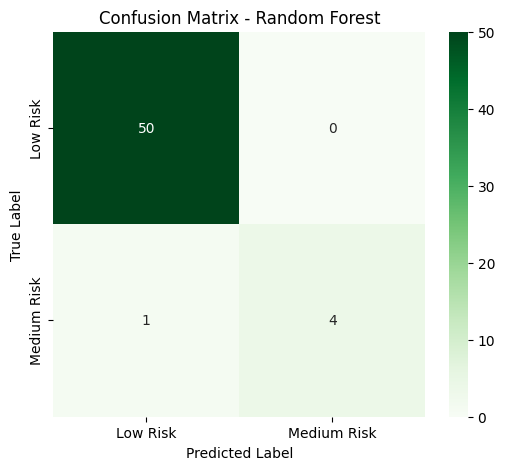

In [6]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf, labels=['Low Risk', 'Medium Risk'])
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", 
            xticklabels=['Low Risk', 'Medium Risk'], 
            yticklabels=['Low Risk', 'Medium Risk'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [7]:
rf_importances = pd.Series(rf.feature_importances_, index=features)

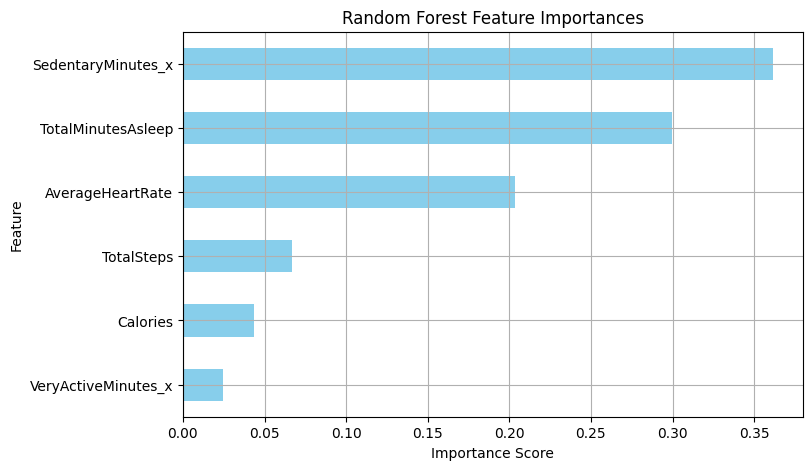

In [8]:
plt.figure(figsize=(8,5))
rf_importances.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True)
plt.show()